In [ ]:
# Requests allows us to make HTTP requests which we will use to get data from an API
import requests
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import datetime

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

# Visualisation

In [ ]:
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Во-первых, давайте попробуем посмотреть, как переменные FlightNumber (указывающие непрерывные попытки запуска) и Payload повлияют на результат запуска.

Мы можем построить график FlightNumber и PayloadMass и наложить на него результат запуска. Мы видим, что по мере увеличения количества рейсов вероятность успешного приземления первой ступени возрастает. Масса полезной нагрузки также важна; похоже, чем массивнее полезная нагрузка, тем меньше вероятность возвращения первой ступени.

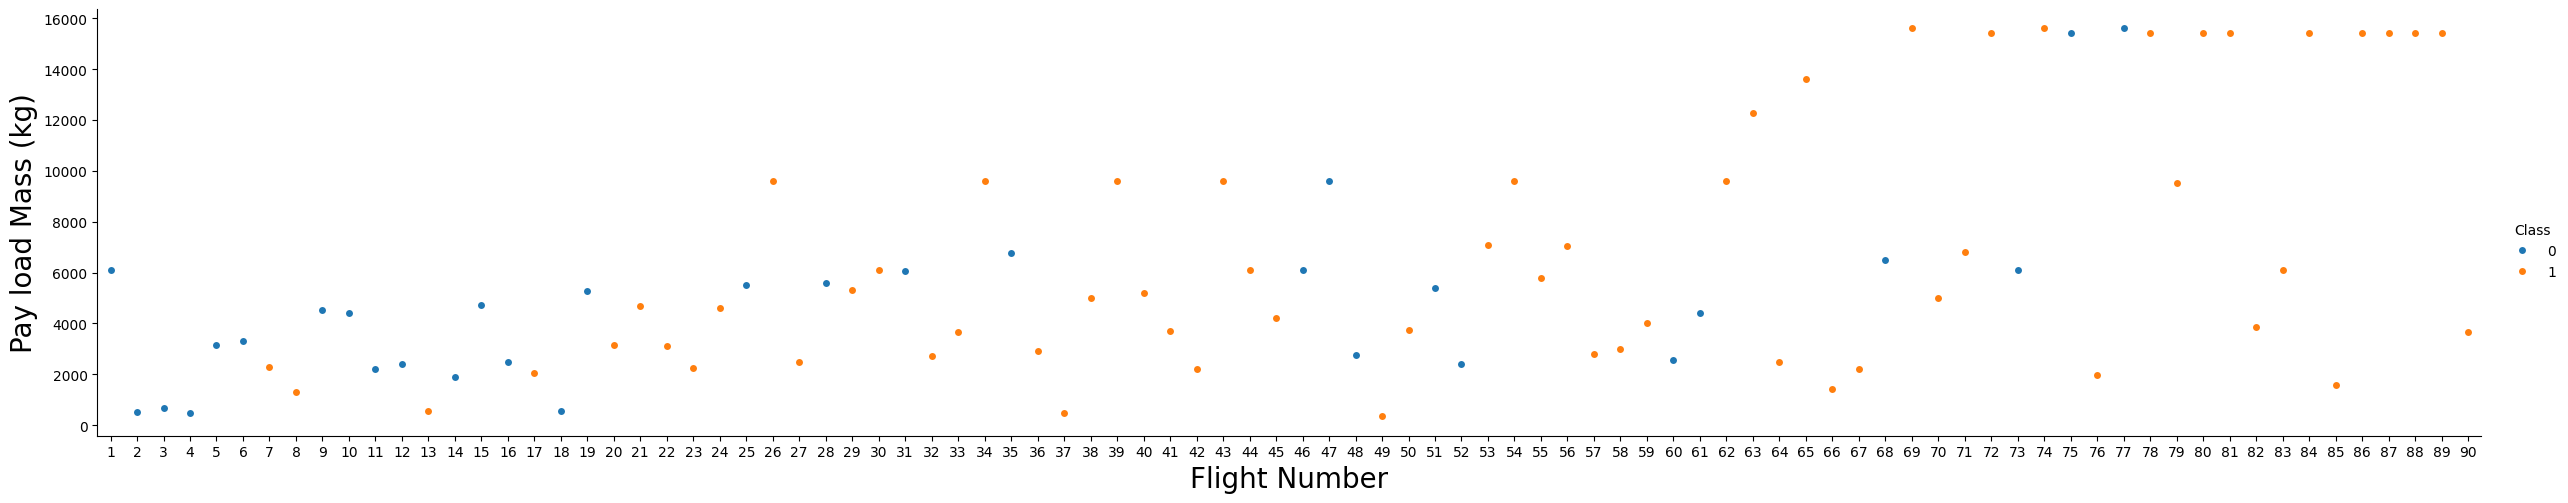

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

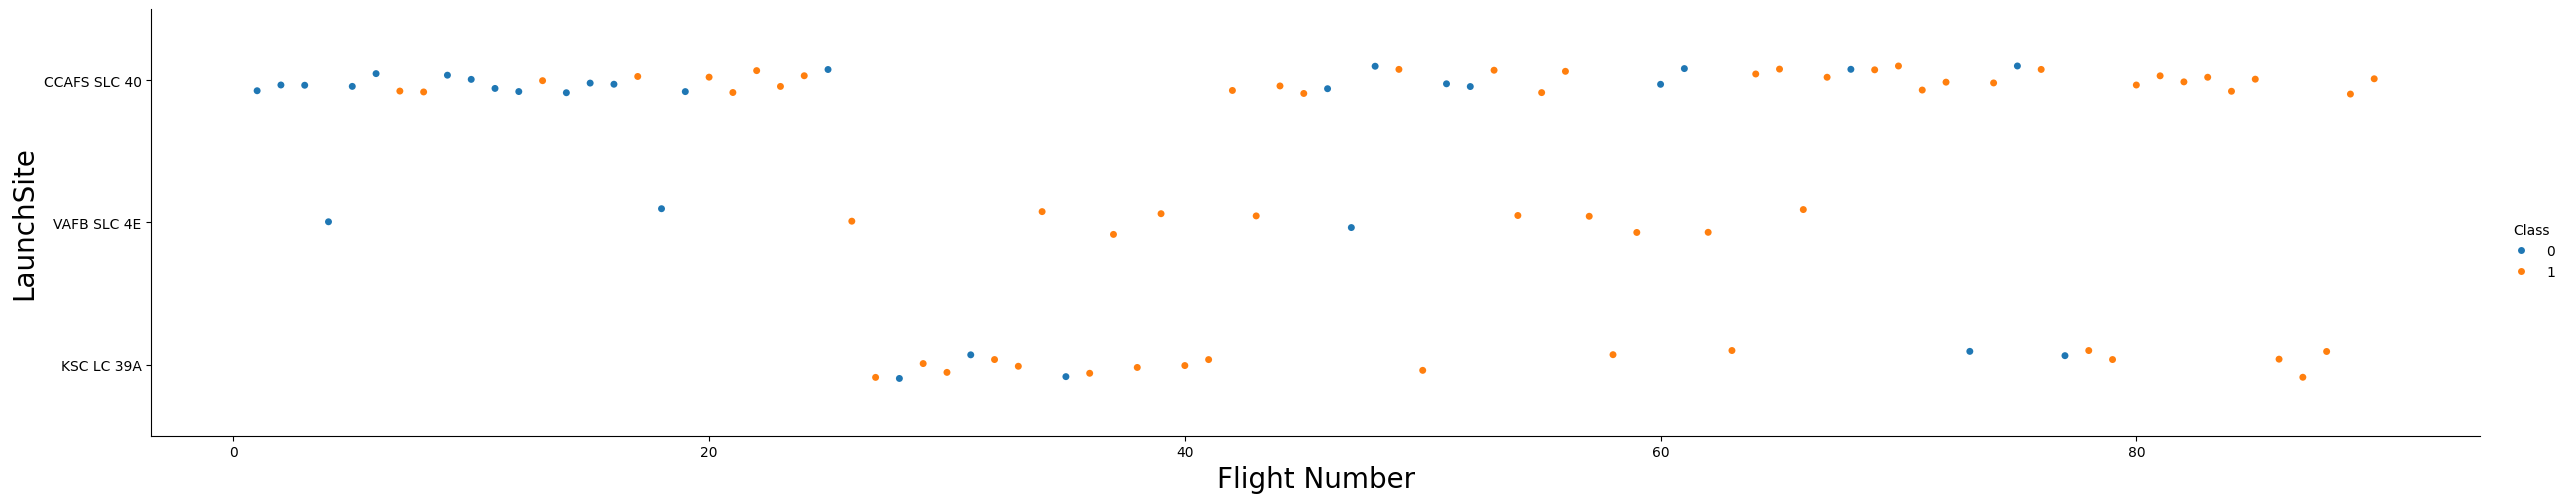

In [ ]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

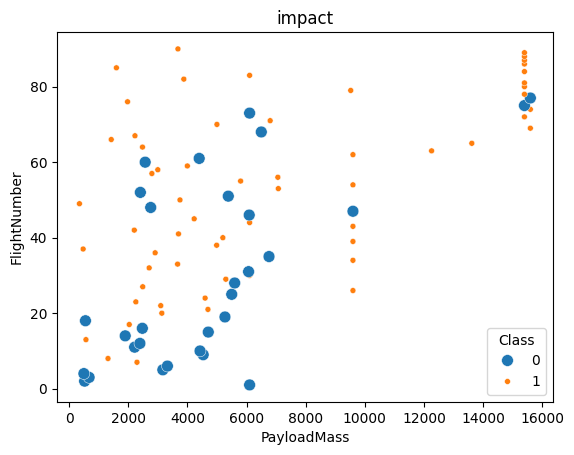

In [ ]:
size=df['Class'] #for bubble effect
sns.scatterplot(data=df, x='PayloadMass', y='FlightNumber', size=size, hue='Class') #you can further include hue='Seasonality_Weight', legend=False)
plt.xlabel('PayloadMass')
plt.ylabel('FlightNumber')
plt.title('impact')
plt.show()

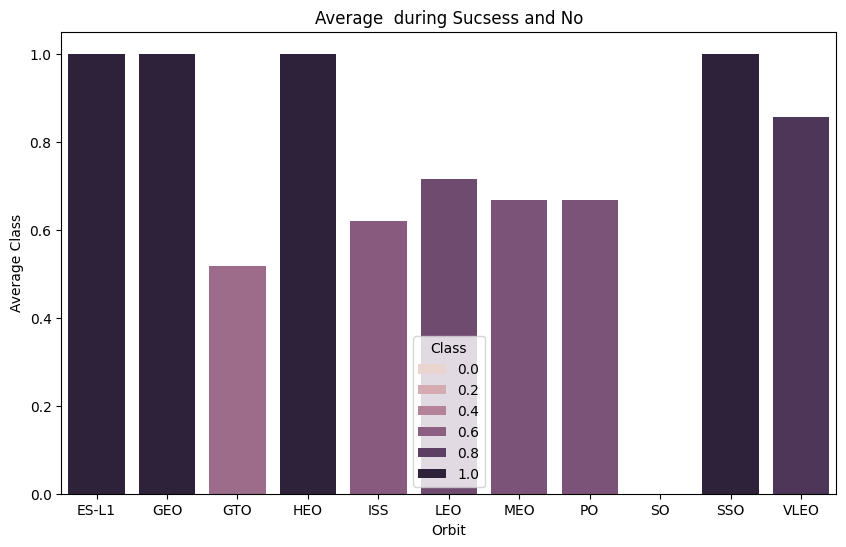

In [ ]:
plt.figure(figsize=(10, 6))
new_df = df.groupby('Orbit')['Class'].mean().reset_index()
sns.barplot(x='Orbit', y='Class', hue='Class',  data=new_df)
plt.xlabel('Orbit')
plt.ylabel('Average Class')
plt.title('Average  during Sucsess and No')
plt.show()

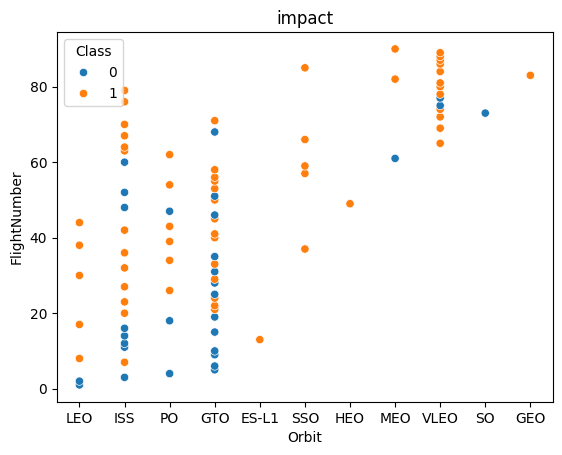

In [ ]:

sns.scatterplot(data=df, x='Orbit', y='FlightNumber', hue='Class') #you can further include hue='Seasonality_Weight', legend=False)
plt.xlabel('Orbit')
plt.ylabel('FlightNumber')
plt.title('impact')
plt.show()

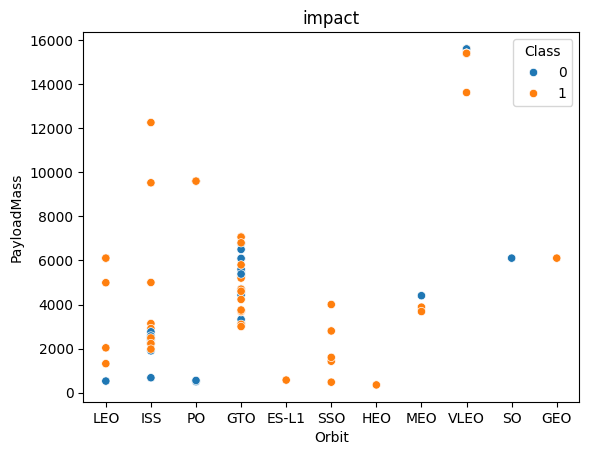

In [ ]:

sns.scatterplot(data=df, x='Orbit', y='PayloadMass', hue='Class') #you can further include hue='Seasonality_Weight', legend=False)
plt.xlabel('Orbit')
plt.ylabel('PayloadMass')
plt.title('impact')
plt.show()

In [ ]:
date=[]

In [ ]:
# A function to Extract years from the date
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year


In [ ]:
df['year']=Extract_year(date)

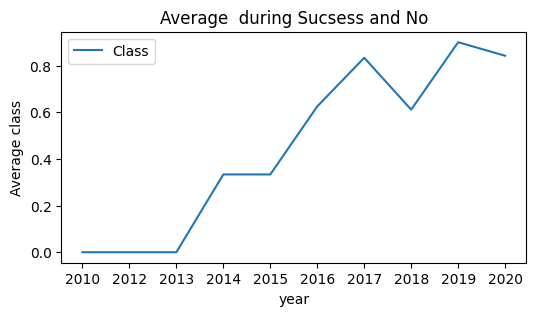

In [ ]:
plt.figure(figsize=(6, 3))
cdf = df.groupby(['year'])['Class'].mean().reset_index()
sns.lineplot(x='year', y='Class',  data=cdf,  label='Class')
plt.xlabel('year')
plt.ylabel('Average class')
plt.title('Average  during Sucsess and No')
plt.show()

In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [ ]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], drop_first =False)

In [ ]:
features_one_hot.head(3)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
features_one_hot.shape

(90, 80)

In [ ]:
features_one_hot = features_one_hot.astype(float)

In [ ]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

Факультативно, если понадобится вот такой пример:

In [ ]:
# import library
from sklearn.preprocessing import OneHotEncoder

# define one hot encoding
encoder = OneHotEncoder(sparse=False)

# transform data
onehot_columns = encoder.fit_transform(df[['Car_model']])

# concat dataframes
df = pd.concat([df, pd.DataFrame(onehot_columns)], axis=1)

# get new encoded column names
encoded_columns_name = encoder.get_feature_names_out(['Car_model'])

# rename columns after encoding
dict_column_names = {0: encoded_columns_name[0],
                     1: encoded_columns_name[1],
                     2: encoded_columns_name[2]}
df.rename(columns=dict_column_names,
          inplace=True)

# show features
df[['Car_model','Car_model_BMW', 'Car_model_Lexus', 'Car_model_Toyota']].head()

### Folium visualisation

ЗАДАЧА 1: Отметить на карте все стартовые площадки.
ЗАДАЧА 2: Отметьте на карте успешные/неудачные запуски для каждого объекта.
ЗАДАЧА 3: Рассчитать расстояния от космодрома до его окрестностей.

In [ ]:
!pip3 install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=6b3880adc52ddd3edcdb094c1e1db91f57a4e83da665e67355f9b6fbebc5c439
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import folium
import wget

In [ ]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

Загрузим и выберем данные с широтой и долготой

In [ ]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)

In [ ]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


Сначала нам нужно создать объект «Карта листа» с начальным центром в Космическом центре имени Джонсона НАСА в Хьюстоне, штат Техас.

In [ ]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

добавить выделенную область круга с текстовой меткой по определенной координате

In [ ]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [ ]:
# Initialize the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
for index, row in launch_sites_df.iterrows():
    coordinate = [row['Lat'], row['Long']]
    folium.Circle(coordinate, radius=1000, color='#000000', fill=True).add_child(folium.Popup(row['Launch Site'])).add_to(site_map)
    folium.map.Marker(coordinate, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % row['Launch Site'], )).add_to(site_map)
site_map

Далее давайте попробуем улучшить карту, добавив результаты запуска для каждого сайта, и посмотрим, какие сайты имеют высокие показатели успеха.

In [ ]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


In [ ]:
marker_cluster = MarkerCluster()

In [ ]:
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'

spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail(10)

,Launch Site,Lat,Long,class,marker_cl,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,<folium.plugins.marker_cluster.MarkerCluster object at 0x79d655c88340>,green
47,KSC LC-39A,28.573255,-80.646895,1,<folium.plugins.marker_cluster.MarkerCluster object at 0x79d655c88340>,green
48,KSC LC-39A,28.573255,-80.646895,1,<folium.plugins.marker_cluster.MarkerCluster object at 0x79d655c88340>,green
49,CCAFS SLC-40,28.563197,-80.576820,1,<folium.plugins.marker_cluster.MarkerCluster object at 0x79d655c88340>,green
50,CCAFS SLC-40,28.563197,-80.576820,1,<folium.plugins.marker_cluster.MarkerCluster object at 0x79d655c88340>,green
51,CCAFS SLC-40,28.563197,-80.576820,0,<folium.plugins.marker_cluster.MarkerCluster object at 0x79d655c88340>,red
52,CCAFS SLC-40,28.563197,-80.576820,0,<folium.plugins.marker_cluster.MarkerCluster object at 0x79d655c88340>,red
53,CCAFS SLC-40,28.563197,-80.576820,0,<folium.plugins.marker_cluster.MarkerCluster object at 0x79d655c88340>,red
54,CCAFS SLC-40,28.563197,-80.576820,1,<folium.plugins.marker_cluster.MarkerCluster object at 0x79d655c88340>,green
55,CCAFS SLC-40,28.563197,-80.576820,0,<folium.plugins.marker_cluster.MarkerCluster object at 0x79d655c88340>,red


In [ ]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed,
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for index, row in spacex_df.iterrows():
    # create and add a Marker cluster to the site map
    coordinate = [row['Lat'], row['Long']]
    folium.map.Marker(coordinate, icon=folium.Icon(color='white',icon_color=row['marker_color'])).add_to(marker_cluster)
site_map

Далее нам необходимо изучить и проанализировать окрестности стартовых площадок.

Давайте сначала добавим MousePosition на карту, чтобы получить координаты курсора мыши над точкой на карте. Таким образом, пока вы изучаете карту, вы можете легко найти координаты любых точек интереса (например, железной дороги)

In [ ]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

рассчитать расстояние между двумя точками на карте на основе их значений широты и долготы, используя следующий метод:

In [ ]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

Координаты железной дороги получим курсором мыши из карты, что. сделили выше

In [ ]:
# find coordinate of the closet coastline
# e.g.,: Lat: 28.56367  Lon: -80.57163
# distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)
launch_site_lat = 28.563197
launch_site_lon = -80.576820
coastline_lat = 28.56334
coastline_lon = -80.56799
distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)
print(distance_coastline,' km')

0.8627671182499878  km


Изобразим дистанцию на карте

In [ ]:
# Create and add a folium.Marker on your selected closest coastline point on the map
# Display the distance between coastline point and launch site using the icon property
# for example
# distance_marker = folium.Marker(
#    coordinate,
#    icon=DivIcon(
#        icon_size=(20,20),
#        icon_anchor=(0,0),
#        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance),
#        )
#    )
distance_marker = folium.Marker(
   [coastline_lat, coastline_lon],
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_coastline),
       )
   )
site_map.add_child(distance_marker)

In [ ]:
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
# lines=folium.PolyLine(locations=coordinates, weight=1)
coordinates = [[launch_site_lat,launch_site_lon],[coastline_lat,coastline_lon]]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

ПОсчитаем дистанцию  до ближайших объектов

In [ ]:
# Create a marker with distance to a closest city, railway, highway relative to CCAFS SLC-40
# Draw a line between the marker to the launch site
closest_highway = 28.56335, -80.57085
closest_railroad = 28.57206, -80.58525
closest_city = 28.10473, -80.64531

In [ ]:
distance_highway = calculate_distance(launch_site_lat, launch_site_lon, closest_highway[0], closest_highway[1])
print('distance_highway =',distance_highway, ' km')
distance_railroad = calculate_distance(launch_site_lat, launch_site_lon, closest_railroad[0], closest_railroad[1])
print('distance_railroad =',distance_railroad, ' km')
distance_city = calculate_distance(launch_site_lat, launch_site_lon, closest_city[0], closest_city[1])
print('distance_city =',distance_city, ' km')

distance_highway = 0.5834695366934144  km
distance_railroad = 1.2845344718142522  km
distance_city = 51.43416999517233  km


In [ ]:
# closest highway marker
distance_marker = folium.Marker(
   closest_highway,
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_highway),
       )
   )
site_map.add_child(distance_marker)
# closest highway line
coordinates = [[launch_site_lat,launch_site_lon],closest_highway]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

# closest railroad marker
distance_marker = folium.Marker(
   closest_railroad,
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_railroad),
       )
   )
site_map.add_child(distance_marker)
# closest railroad line
coordinates = [[launch_site_lat,launch_site_lon],closest_railroad]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

# closest city marker
distance_marker = folium.Marker(
   closest_city,
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_city),
       )
   )
site_map.add_child(distance_marker)
# closest city line
coordinates = [[launch_site_lat,launch_site_lon],closest_city]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

Мои выводы

Как упоминалось ранее, стартовые площадки расположены в непосредственной близости от экватора, чтобы минимизировать расход топлива за счет использования вращения Земли на восток со скоростью ~ 30 км/сек, чтобы помочь космическим кораблям выйти на орбиту.
Стартовые площадки расположены в непосредственной близости от береговой линии, поэтому они могут летать над океаном во время запуска, по крайней мере, по двум причинам безопасности: (1) у экипажа есть возможность прервать запуск и попытаться приземлиться на воду (2) свести к минимуму риск падения людей и имущества. обломки.
Стартовые площадки находятся в непосредственной близости от автомагистралей, что позволяет без труда транспортировать необходимых людей и имущество.
Стартовые площадки находятся в непосредственной близости от железных дорог, что позволяет перевозить тяжеловесные грузы.
Пусковые площадки находятся не в непосредственной близости от городов, что сводит к минимуму опасность для густонаселенных районов.

SpaceX Launch Records Dashboard в отдельном файле